# Getting Dependencies

In [2]:
%%time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
from sklearn import tree

Wall time: 0 ns


# Read acquired data

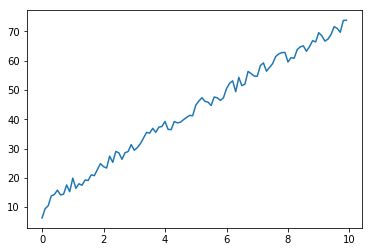

In [3]:
df = pd.read_excel('StrainGauge_Calibration.xlsx')
df.head()
plt.plot(df['Voltage (V)'].values,df['Weight (N)'].values)
X = df['Voltage (V)'].values.reshape(-1,1)
y = df['Weight (N)'].values.reshape(-1,1)

# Split and Define Error Function

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0) 
Error_Percent = {}
trained_models = {}
def error(x,y):
    x = np.array(x)
    y = np.array(y)    
    return np.mean((x-y)**2)**0.5*100/np.mean(x)

# Prediction using Information Entropy based Algorithms

Error =  66.66957604913618


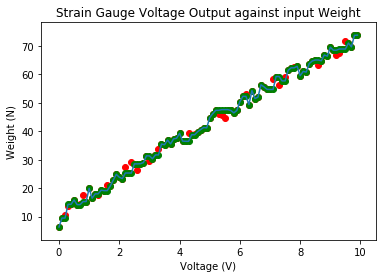

In [5]:
regr = DecisionTreeRegressor(max_depth=10)
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)
Error_Percent['Information Entropy based ML algorithms'] = error(y_test,y_pred)
y_predf = regr.predict(X)

print('Error = ',error(y_test,y_pred))

plt.scatter(X,y,c ='r')
plt.plot(X,y_predf)
plt.scatter(X,y_predf,c='g')

plt.title('Strain Gauge Voltage Output against input Weight')
plt.xlabel('Voltage (V)')
plt.ylabel('Weight (N)')

trained_models['Information Entropy based ML algorithms'] = regr

# Polynomial Regression

 Accuracy Percentage:  96.3264351566606 
 Degree of Polynomial:  9


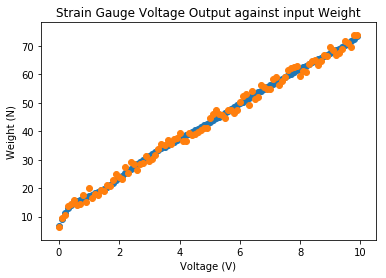

In [6]:
from sklearn.preprocessing import PolynomialFeatures

models = []
# Test upto 10 degree polynomial

for j in range(10):
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_train)
    models.append(poly_x)

from sklearn.linear_model import LinearRegression

regressors = []
y_preds = []
mses = []

for model in models:
    regressor = LinearRegression()
    regressor.fit(model,y_train)
    regressors.append(regressor)

j=0
min_mse = -1
minj = -1

for regressor in regressors:
    poly = PolynomialFeatures(degree=j)
    poly_x = poly.fit_transform(X_test)    
    y_pred  = regressor.predict(poly_x)
    mse = error(y_test,y_pred)
    
    if(j==0):
        min_mse = mse
        minj = 0
    elif(min_mse>mse):
        min_mse = mse
        minj = j
    j+=1


print(' Accuracy Percentage: ', 100 - min_mse, '\n' , 'Degree of Polynomial: ',minj)

Error_Percent['Polynomial_Regression'] = min_mse
poly = PolynomialFeatures(degree=minj)
poly_x = poly.fit_transform(X)    
y_pred  = regressors[minj].predict(poly_x)
plt.scatter(X,y_pred)
plt.scatter(X,y)

plt.title('Strain Gauge Voltage Output against input Weight')
plt.xlabel('Voltage (V)')
plt.ylabel('Weight (N)')

trained_models['Polynomial_Regression'] = regressors[minj]
Model = regressors[minj]

In [7]:
def predict(k):
    if(k>11 or k<0):
        return 'Out of Range'
    else:
        k = np.array([[k]])
        poly = PolynomialFeatures(degree=minj)
        poly_k = poly.fit_transform(k)    
        y_k  = regressors[minj].predict(poly_k)    
        return y_k

# I/O Function

In [8]:
print("Weight  = ","{:.2f}".format(predict(float(input('Enter Observed Voltage (Range: 0 to 10V) ')))[0][0]),'N')

Enter Observed Voltage (Range: 0 to 10V) 8.25
Weight  =  63.34 N
